<a href="https://colab.research.google.com/github/preetikumari5/Machine-Learning/blob/main/Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Using XGBoost**

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

Types of Time Series Data

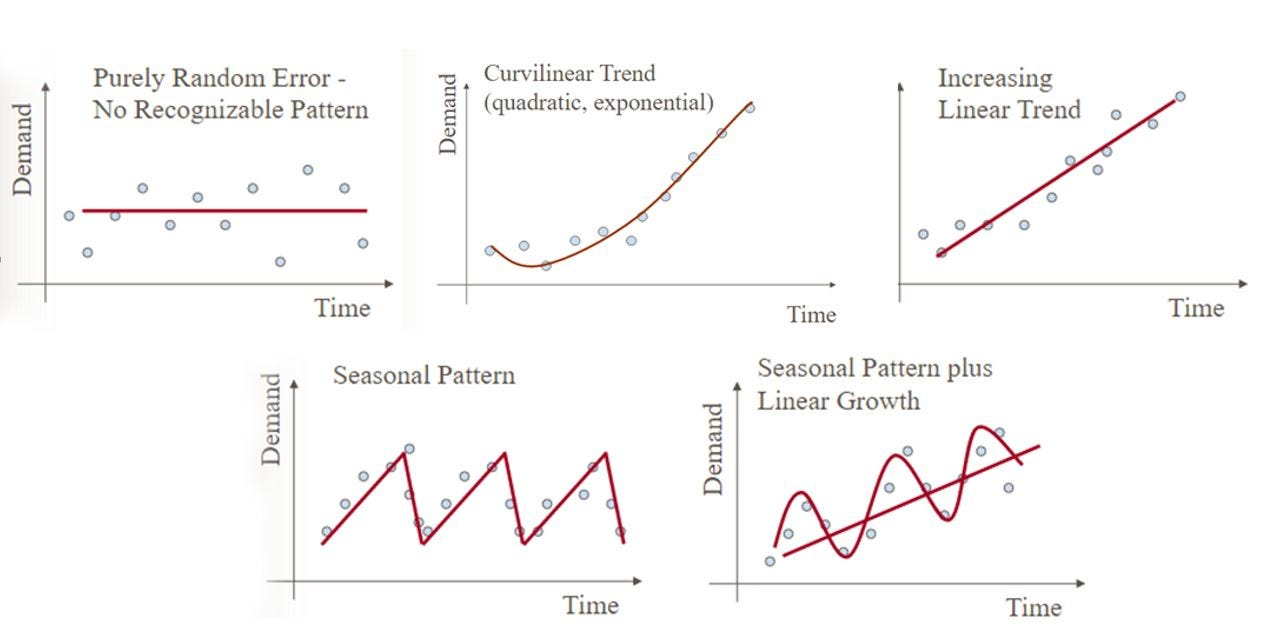

In [86]:
df = pd.read_csv('/content/Hourly Energy Consumption/PJME_hourly.csv')
df = df.set_index('Datetime')

In [87]:
df.index

Index(['2002-12-31 01:00:00', '2002-12-31 02:00:00', '2002-12-31 03:00:00',
       '2002-12-31 04:00:00', '2002-12-31 05:00:00', '2002-12-31 06:00:00',
       '2002-12-31 07:00:00', '2002-12-31 08:00:00', '2002-12-31 09:00:00',
       '2002-12-31 10:00:00',
       ...
       '2018-01-01 15:00:00', '2018-01-01 16:00:00', '2018-01-01 17:00:00',
       '2018-01-01 18:00:00', '2018-01-01 19:00:00', '2018-01-01 20:00:00',
       '2018-01-01 21:00:00', '2018-01-01 22:00:00', '2018-01-01 23:00:00',
       '2018-01-02 00:00:00'],
      dtype='object', name='Datetime', length=145366)

In [88]:
df.index = pd.to_datetime(df.index)

In [89]:
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


In [90]:
df.tail()

,PJME_MW
Datetime,
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0
2018-01-01 23:00:00,40164.0
2018-01-02 00:00:00,38608.0


<Axes: title={'center': 'PJME energy use in MW'}, xlabel='Datetime'>

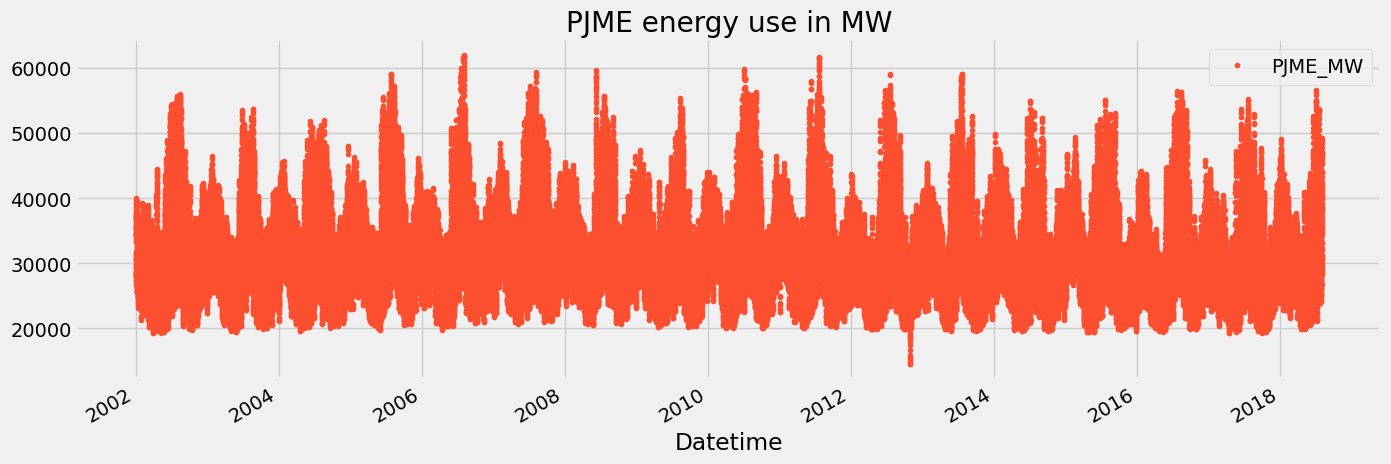

In [91]:
df.plot(
    style='.',
    figsize=(15,5),
    color=color_pal[1],
    title='PJME energy use in MW'
)

Train / Test Split

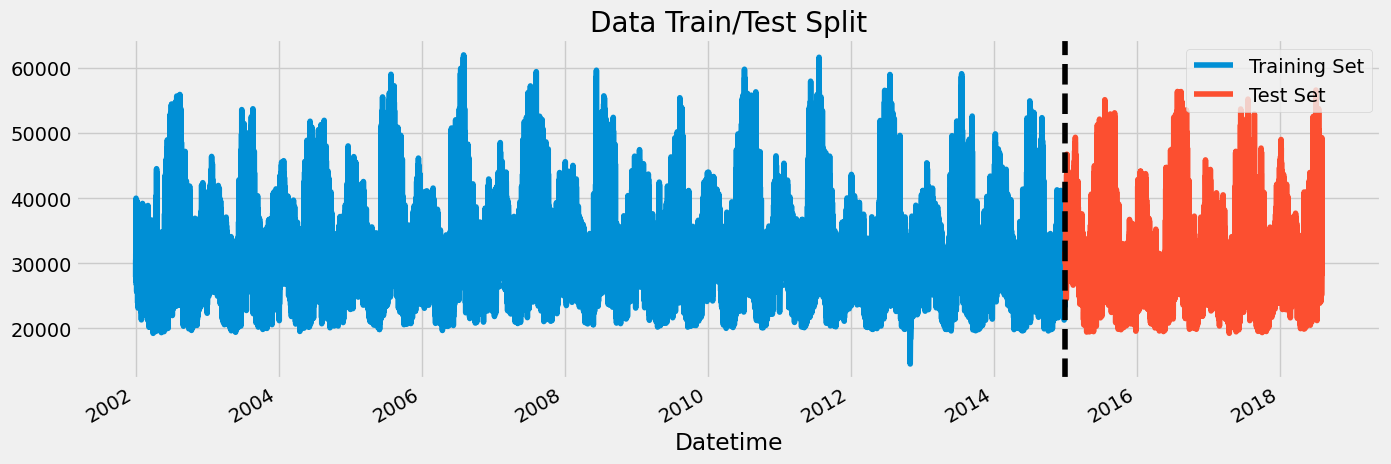

In [92]:
train = df.loc[df.index < '01-01-2015']
test = df.loc[df.index >= '01-01-2015']

fig , ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax , label='Training set',title='Data Train/Test Split')
test.plot(ax=ax , label='Test Set')
ax.axvline('01-01-2015',color='black',ls='--')
ax.legend(['Training Set','Test Set'])
plt.show()

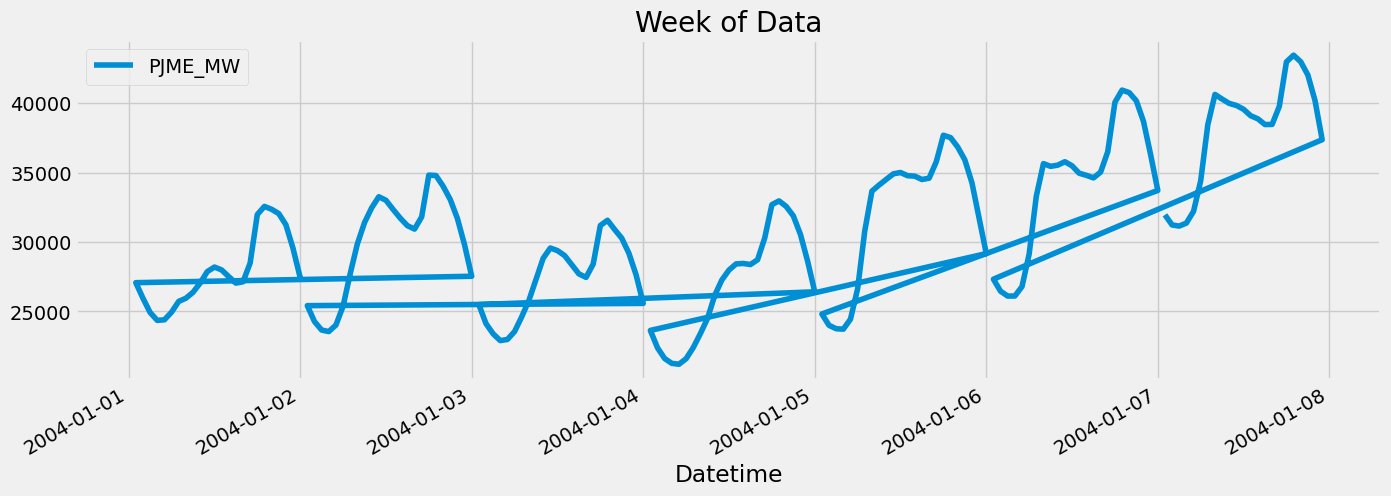

In [93]:
df.loc[(df.index > '01-01-2004') & (df.index < '01-08-2004')].plot(figsize=(15,5),title='Week of Data')
plt.show()

# Feature Creation

In [94]:
def create_features(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    return df

In [95]:
df = create_features(df)

In [96]:
df.head()

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear
Datetime,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,4,12,2002,365
2002-12-31 02:00:00,25147.0,2,1,4,12,2002,365
2002-12-31 03:00:00,24574.0,3,1,4,12,2002,365
2002-12-31 04:00:00,24393.0,4,1,4,12,2002,365
2002-12-31 05:00:00,24860.0,5,1,4,12,2002,365


# Visulaize  our Feature / Target Relationship

<ipython-input-97-2b05d2ff1552>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='hour',y='PJME_MW',palette='pastel')


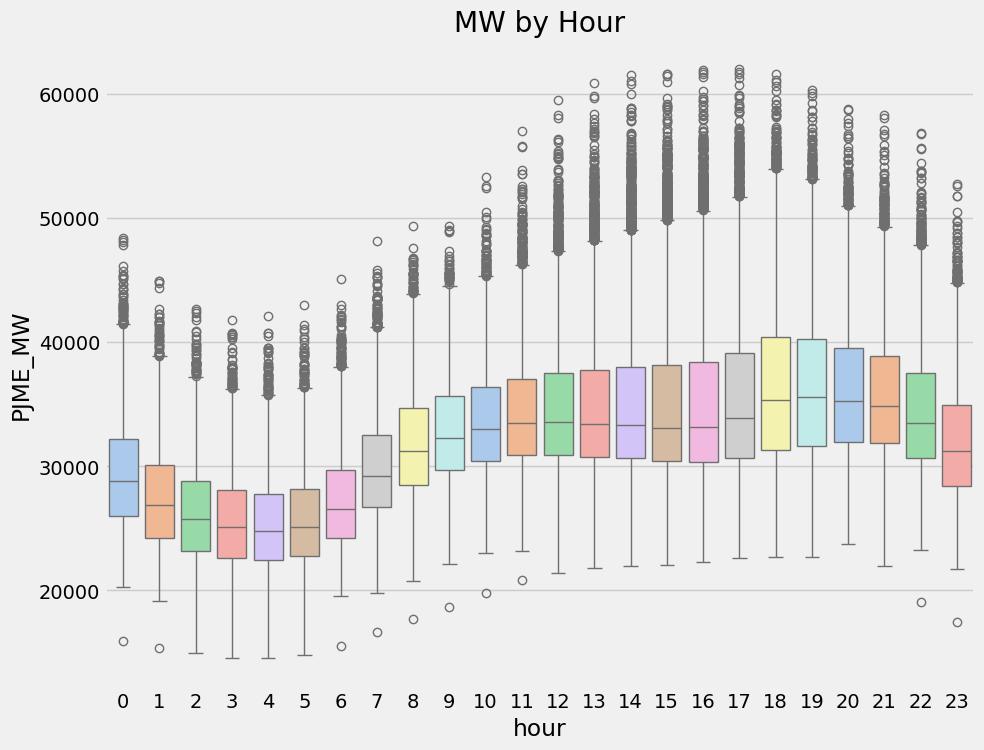

In [97]:
fig,ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df,x='hour',y='PJME_MW',palette='pastel')
ax.set_title('MW by Hour')
plt.show()

<ipython-input-98-eb65a17b68fd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='month',y='PJME_MW',palette='deep')


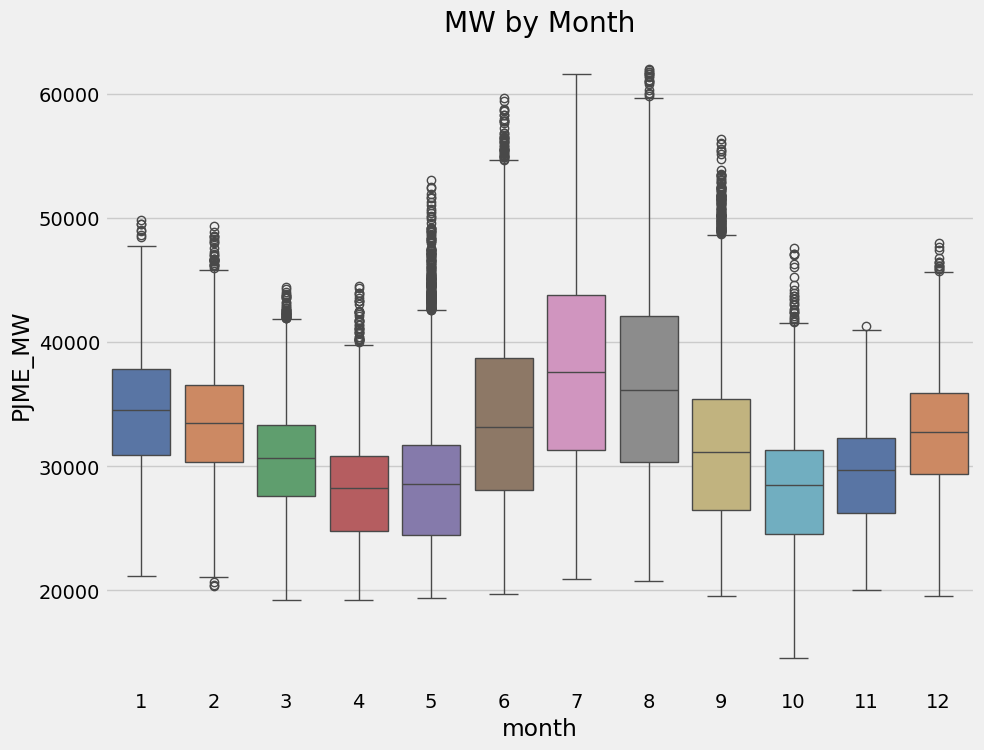

In [98]:
fig,ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df,x='month',y='PJME_MW',palette='deep')
ax.set_title('MW by Month')
plt.show()

# Create Model

In [99]:
train = create_features(train)
test = create_features(test)

FEATURES = ['dayofyear','hour','dayofweek','quarter','month','year']
TARGET = 'PJME_MW'
x_train = train[FEATURES]
y_train = train[TARGET]
x_test = test[FEATURES]
y_test = test[TARGET]

In [100]:
reg = xgb.XGBRegressor( base_score = 0.5,
                        booster='gbtree',
                        n_estimators=1000,
                        early_stopping_rounds=50,
                        objective='reg:linear',
                        max_depth=3,
                        learning_rate = 0.01
                      )
reg.fit(x_train,y_train,
        eval_set=[(x_train,y_train),(x_test,y_test)],
        verbose=100)

[0]	validation_0-rmse:32605.13970	validation_1-rmse:31657.15729


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:53:45] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:12584.35462	validation_1-rmse:11747.28803
[200]	validation_0-rmse:5837.33066	validation_1-rmse:5363.58554
[300]	validation_0-rmse:3923.28511	validation_1-rmse:4020.48045
[400]	validation_0-rmse:3447.54638	validation_1-rmse:3860.60088
[500]	validation_0-rmse:3288.19208	validation_1-rmse:3816.37862
[600]	validation_0-rmse:3206.55619	validation_1-rmse:3779.04119
[700]	validation_0-rmse:3153.61368	validation_1-rmse:3754.45684
[800]	validation_0-rmse:3114.34038	validation_1-rmse:3738.38209
[900]	validation_0-rmse:3084.39550	validation_1-rmse:3730.01893
[988]	validation_0-rmse:3060.25324	validation_1-rmse:3728.07396


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

#Feature Importance

In [101]:
fi = pd.DataFrame(data=reg.feature_importances_,
                  index=reg.feature_names_in_,
                  columns=['importance']
                  )

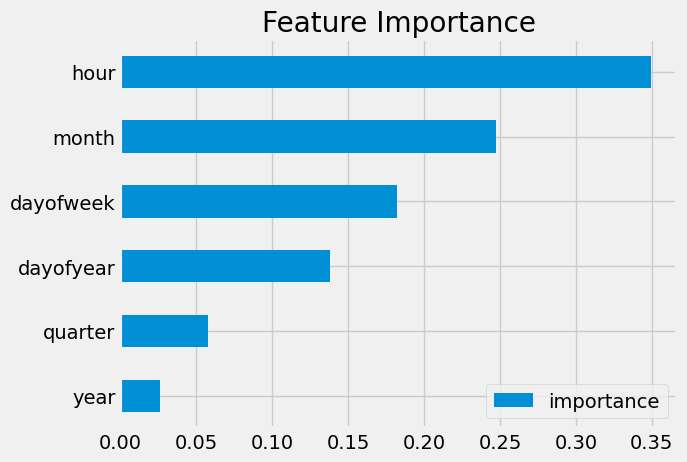

In [102]:
fi.sort_values('importance').plot(kind='barh',title='Feature Importance')
plt.show()

#Forecast on Test

In [103]:
test['prediction'] = reg.predict(x_test)

In [104]:
df = df.merge(test[['prediction']],how='left',left_index=True,right_index=True)

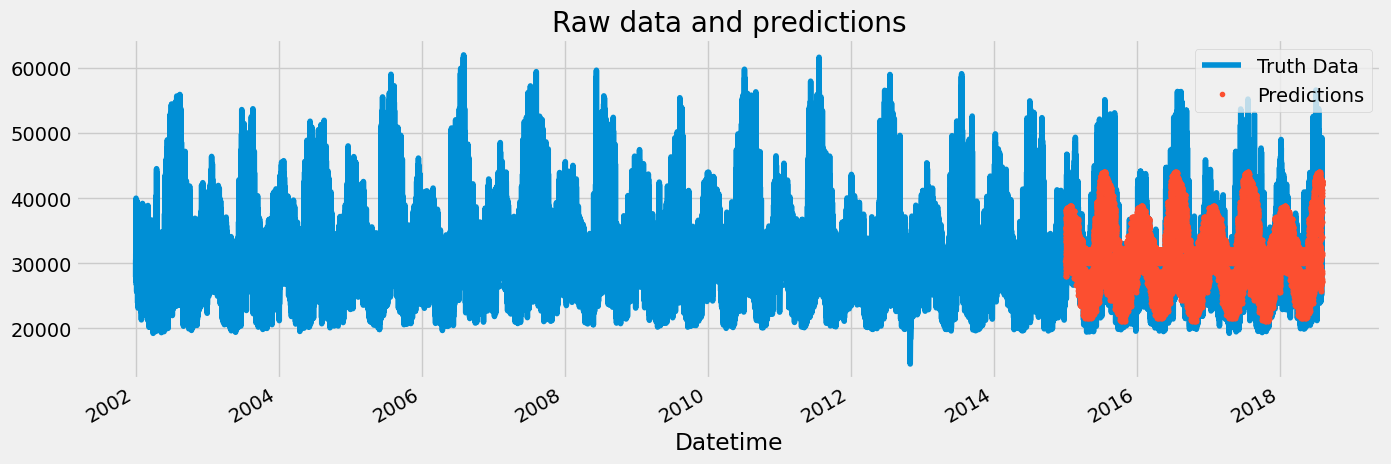

In [105]:
ax = df[['PJME_MW']].plot(figsize=(15,5))
df['prediction'].plot(ax=ax,style='.')
plt.legend(['Truth Data','Predictions'])
ax.set_title('Raw data and predictions')
plt.show()

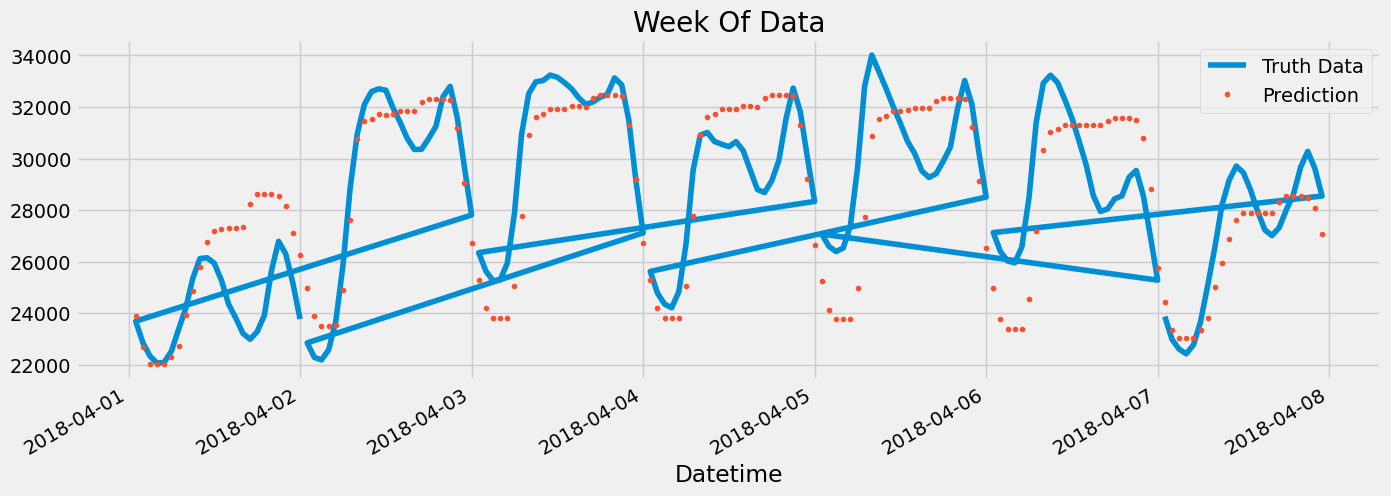

In [106]:
ax = df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['PJME_MW'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.show()

# Score (RMSE)

In [107]:
score = np.sqrt(mean_squared_error(test['PJME_MW'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 3726.80


#Calculate Error


*   Look at the worst and best predicted days




In [108]:

test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

,error
date,
2016-08-13,12879.484619
2016-08-14,12772.887207
2015-02-20,11186.031494
2016-09-09,10966.513102
2016-09-10,10889.102214
2018-01-06,10642.975830
2016-08-12,10041.172689
2015-02-21,9988.168783
2015-02-16,9900.809326


In [109]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=True).head(10)

,error
date,
2017-10-24,322.958008
2015-10-28,426.451335
2016-10-27,543.167155
2015-05-06,556.749674
2017-10-15,569.468262
2018-05-16,569.951009
2015-11-06,678.310140
2017-04-07,687.475911
2016-12-29,706.143392
